In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
test['Survived'] = ''

In [4]:
df = pd.concat([train, test], sort=False)

In [5]:
df.reset_index(inplace=True, drop=True)

In [6]:
df.iloc[152, :]

PassengerId                 153
Survived                      0
Pclass                        3
Name           Meo, Mr. Alfonzo
Sex                        male
Age                        55.5
SibSp                         0
Parch                         0
Ticket               A.5. 11206
Fare                       8.05
Cabin                       NaN
Embarked                      S
Name: 152, dtype: object

In [7]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

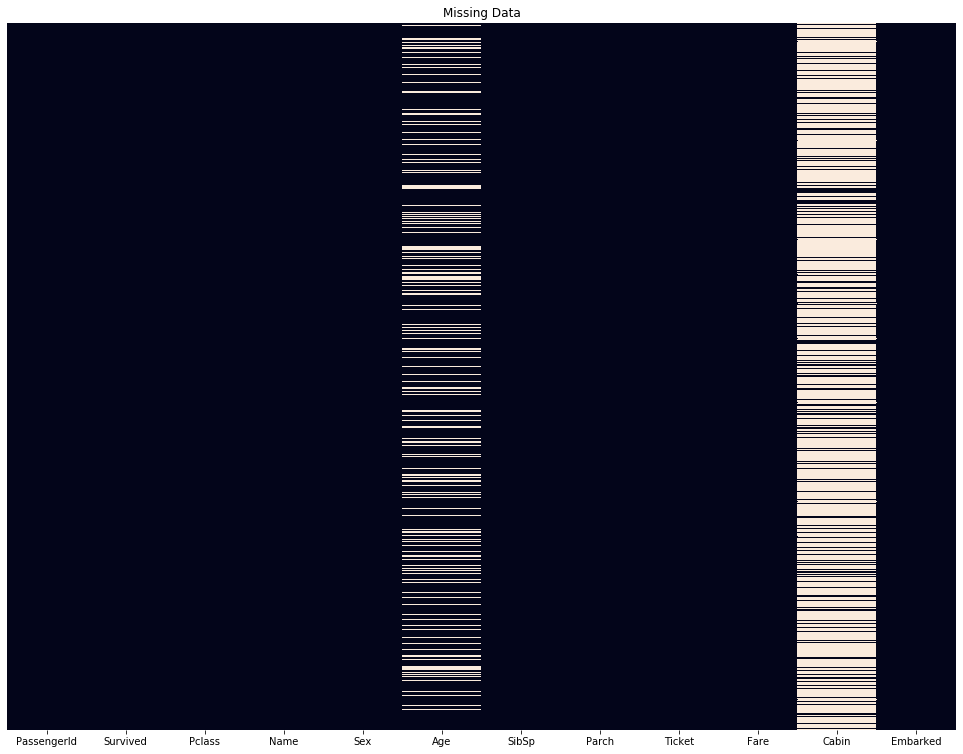

In [8]:
plt.figure(figsize=(17,13))
ax = sns.heatmap(df.isna(),cbar=False);
ax.set_yticks([]);
ax.set_title('Missing Data');

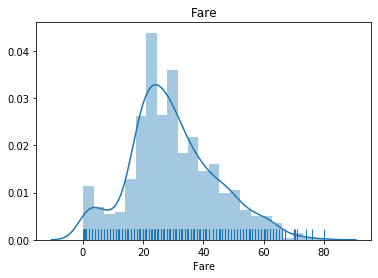

In [9]:
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(df['Age'].dropna(), rug=True)
ax.set_title('Fare')
ax.set_xlabel('Fare')
plt.show()

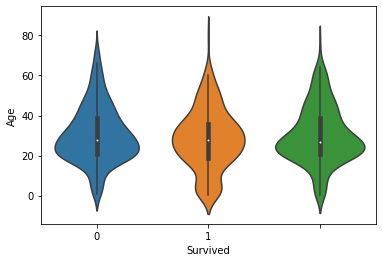

In [10]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='Survived', y='Age', data=df)
plt.show()

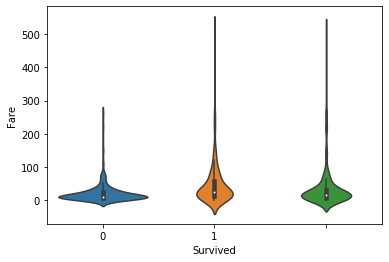

In [11]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='Survived', y='Fare', data=df)
plt.show()

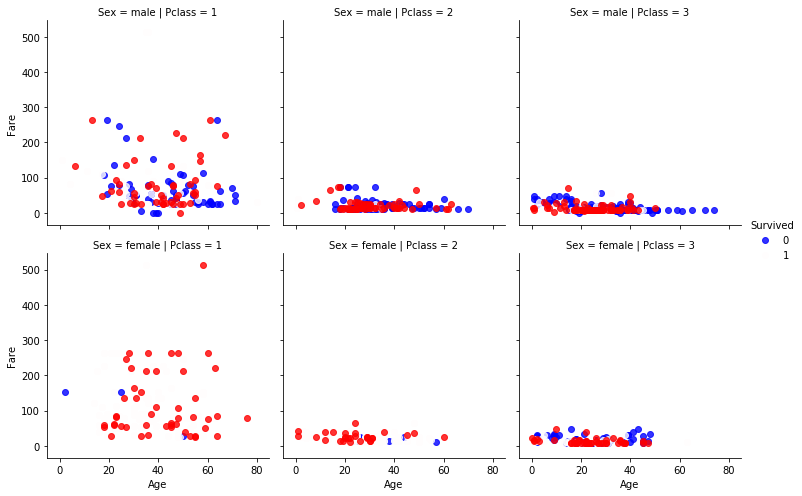

In [12]:
grid = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', palette='seismic', height=3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha=0.8)
grid.add_legend()

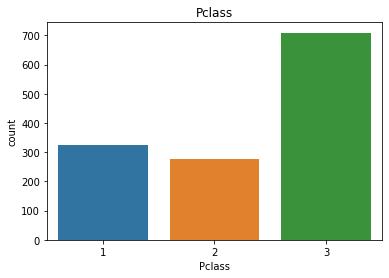

In [13]:
count, ax = plt.subplots()
ax = sns.countplot('Pclass', data=df)
ax.set_title('Pclass')
ax.set_xlabel('Pclass')
plt.show()

In [14]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


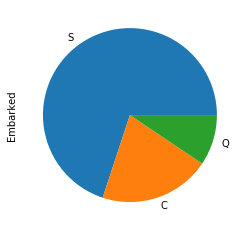

In [15]:
df['Embarked'].value_counts().plot.pie()

In [16]:
# Fills with mode where 'Embarked' equals NaN

df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [17]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [18]:
df.Fare.mode()

0    8.05
dtype: float64

In [19]:
classes = df.Pclass.unique()

In [20]:
classes.sort()
classes

array([1, 2, 3], dtype=int64)

In [21]:
class_fare = pd.DataFrame()
for clas in classes:
    class_fare[clas] = df[df.Pclass == clas].Fare.describe()
class_fare = class_fare.T
class_fare

,count,mean,std,min,25%,50%,75%,max
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [22]:
class_fare.loc[3, 'mean']

13.302888700564969

In [23]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [24]:
for i in df[df['Fare'].isna()].index:
    print(i)
    print(df.iloc[i, df.columns.get_loc('Fare')])
    print(class_fare.loc[df.iloc[i, df.columns.get_loc('Pclass')], 'mean'])
    df.iloc[i, df.columns.get_loc('Fare')] = class_fare.loc[df.iloc[i, df.columns.get_loc('Pclass')], 'mean']    
    print(df.iloc[i, df.columns.get_loc('Fare')])

1043
nan
13.302888700564969
13.302888700564969


In [25]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
titulo = re.compile(r'\b[a-zA-Z]+\b\.')
def title(full_name):
    x = re.search(titulo, full_name)
    return x.group()

In [27]:
def correct_name(full_name):
    if '(' in full_name:
        x = re.search(r'(?<=[\(])(?P<nome>[\W\w]+)(?=[\)])', full_name)
        #x = re.search(r'(?<=[\(])(?P<nome>[\"\.\-\w\s]+)(?=[\)])', full_name)
        return x.group('nome')
    else:
        surname = re.search(r'^(?P<sobrenome>[\W\w]+)(?=[\,])', full_name)
        name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[^\(][\w\W]+)', full_name)
        #surname = re.search(r'^(?P<sobrenome>[\'\-\w\s]+)(?=[\,])', full_name)
        #name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[\w\s\"]+)', full_name)
        return name.group('nome') + ' ' + surname.group('sobrenome')

In [28]:
def family_name(full_name):
    x = re.search(r'^.+(?=[\,])', full_name)
    return x.group()

In [29]:
def family_nickname(full_name):
    x = re.search(r'(?<=\.\s).*?(?= \(|$)', full_name)
    return x.group()

In [30]:
df['Title'] = df['Name'].apply(title)

In [31]:
df['Person'] = df['Name'].apply(correct_name)

In [32]:
df['FamilyName'] = df['Name'].apply(family_name)

In [33]:
df['FamilyNickname'] = df['Name'].apply(family_nickname)

In [34]:
df['HasFamilyOnboard'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

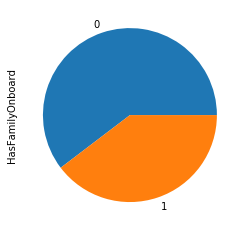

In [35]:
df.HasFamilyOnboard.value_counts().plot.pie()

In [36]:
df['EmbarkedWithSomeone'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

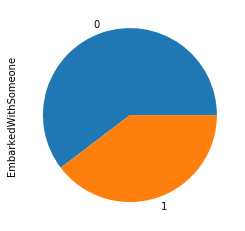

In [37]:
df.EmbarkedWithSomeone.value_counts().plot.pie()

In [39]:
df['Deck'] = df.Cabin.fillna('~').str.extract(r'(^\w)')

In [40]:
df['Deck'].fillna('Z', inplace=True)

In [41]:
df['Deck'].value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [38]:
df['TicketNum'] = df.Ticket.str.extract(r'(\d+$)').fillna('-1').astype('int32')

In [42]:
df[df.TicketNum == -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person,FamilyName,FamilyNickname,HasFamilyOnboard,EmbarkedWithSomeone,TicketNum,Deck
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr.,Lionel Leonard,Leonard,Lionel,0,0,-1,Z
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr.,William Henry Tornquist,Tornquist,William Henry,0,0,-1,Z
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr.,William Cahoone Jr Johnson,Johnson,William Cahoone Jr,0,0,-1,Z
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr.,Alfred Johnson,Johnson,Alfred,0,0,-1,Z


In [43]:
tick = 1
maxim = df.TicketNum.max()
line_tickets = df[df.TicketNum == -1].TicketNum.index
for ticke in line_tickets:
    df.iloc[ticke, df.columns.get_loc('TicketNum')] = maxim + tick
    tick += 10

In [44]:
df.iloc[df[df.TicketNum.duplicated(keep=False)].index, df.columns.get_loc('EmbarkedWithSomeone')] = 1

In [45]:
maxim

3101317

In [46]:
df.TicketNum.max()

3101348

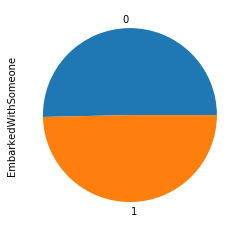

In [47]:
df.EmbarkedWithSomeone.value_counts().plot.pie()

In [48]:
family_names = dict()
for name in df.FamilyName.unique():
    family_names[name] = df[df.FamilyName == name].TicketNum

In [49]:
import math

In [50]:
new_series = ''
for k, v in family_names.items():
    print(k)
    v = v.sort_values()
    n = df.TicketNum.max()
    for num in v:
        
        n = num

Braund
Cumings
Heikkinen
Futrelle
Allen
Moran
McCarthy
Palsson
Johnson
Nasser
Sandstrom
Bonnell
Saundercock
Andersson
Vestrom
Hewlett
Rice
Williams
Vander Planke
Masselmani
Fynney
Beesley
McGowan
Sloper
Asplund
Emir
Fortune
O'Dwyer
Todoroff
Uruchurtu
Spencer
Glynn
Wheadon
Meyer
Holverson
Mamee
Cann
Nicola-Yarred
Ahlin
Turpin
Kraeff
Laroche
Devaney
Rogers
Lennon
O'Driscoll
Samaan
Arnold-Franchi
Panula
Nosworthy
Harper
Faunthorpe
Ostby
Woolner
Rugg
Novel
West
Goodwin
Sirayanian
Icard
Harris
Skoog
Stewart
Moubarek
Nye
Crease
Kink
Jenkin
Hood
Chronopoulos
Bing
Moen
Staneff
Moutal
Caldwell
Dowdell
Waelens
Sheerlinck
McDermott
Carrau
Ilett
Backstrom
Ford
Slocovski
Celotti
Christmann
Andreasson
Chaffee
Dean
Coxon
Shorney
Goldschmidt
Greenfield
Doling
Kantor
Petranec
Petroff
White
Johansson
Gustafsson
Mionoff
Salkjelsvik
Moss
Rekic
Porter
Zabour
Barton
Jussila
Attalah
Pekoniemi
Connors
Baxter
Hickman
Moore
Webber
McMahon
Madsen
Peter
Ekstrom
Drazenoic
Coelho
Robins
Weisz
Sobey
Richard
Newsom
O

In [51]:
groups = df.TicketNum.value_counts()

In [52]:
df['GroupNum'] = ""

In [53]:
for group in groups.iteritems():
    grupo = df[df.TicketNum == group[0]].index
    for pessoa in grupo:
        df.iloc[pessoa, df.columns.get_loc('GroupNum')] = len(grupo)

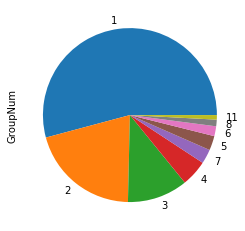

In [54]:
df.GroupNum.value_counts().plot.pie()

In [55]:
df.GroupNum.sample(10)

1135    4
718     2
98      2
691     2
245     3
495     2
904     2
458     1
71      8
484     2
Name: GroupNum, dtype: int64

In [56]:
df['IsChild'] = np.where((df['Age'] < 13), (13 - df['Age']), 0)

In [57]:
df['IsOveraged'] = np.where((df['Age'] > 51), (df['Age'] - 51), df['AgeRiskFactor'])

KeyError: 'AgeRiskFactor'

In [ ]:
df["IsChild"].sample(10)

In [ ]:
df['AgeRiskFactor'].value_counts()

In [ ]:
cats = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']].copy()
#cats = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].copy()

In [ ]:
hot = OneHotEncoder(sparse=False)
cats_hot = hot.fit_transform(cats)

In [ ]:
cats_hot = pd.DataFrame(cats_hot,columns=hot.get_feature_names())
cats_hot.head()

In [ ]:
df = df.merge(cats_hot,how='left',on=df.index)

In [ ]:
df[df.Age.isna()].GroupNum.value_counts().plot.bar()

In [ ]:
df.Age.mean()

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.sample(1).T

In [ ]:
df.drop(['key_0', 'PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Person', 'FamilyName', 'FamilyNickname', 'TicketNum'], axis=1, inplace=True)

In [ ]:
df.isna().any().any()

In [ ]:
df[df['Fare'].isna()]

In [ ]:
plt.figure(figsize=(17,13))
ax3 = sns.heatmap(df.isna(),cbar=False);
ax3.set_yticks([]);
ax3.set_title('Missing Data');

df.plot.scatter(x='Age', c='Survived', y='Fare')

In [ ]:
escalar = df[['Age', 'Fare', 'GroupNum', 'AgeRiskFactor']]

In [ ]:
scaler = MinMaxScaler(copy=False)

In [ ]:
scaler.fit(escalar)

In [ ]:
scaler.data_max_

In [ ]:
scaler.data_min_

In [ ]:
escalar = pd.DataFrame(scaler.transform(escalar), columns=('Age_x', 'Fare_x', 'GroupNum_x', 'AgeRiskFactor_x'))

In [ ]:
escalar

In [ ]:
df = df.merge(escalar,how='left',on=df.index)

In [ ]:
df.drop(['Age', 'Fare', 'GroupNum', 'AgeRiskFactor'], axis=1, inplace=True)

In [ ]:
features = df.drop('Survived',axis=1).columns
target = df.Survived.name

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[features],df[target],test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

{'max_iter': 100, 'penalty': 'l1', 'solver': 'warn'}

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(df[features],df[target])

In [ ]:
logreg.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression()
params = {'penalty':['l1','l2'],'max_iter':[100,200,300,400],'solver':['warn','liblinear','saga']}


grid = GridSearchCV(logreg,param_grid=params,cv=5)
grid.fit(df[features],df[target])

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
colormap = plt.cm.binary
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    print()


from sklearn.metrics import classification_report
y_true, y_pred = y_test, grid.predict(x_test)
print(classification_report(y_true, y_pred))

y_test

In [ ]:
test = pd.read_csv("../data/test.csv")

In [ ]:
# Fills with mode where 'Embarked' equals NaN

test['Embarked'].fillna(test.Embarked.mode()[0], inplace=True)

In [ ]:
classes = test.Pclass.unique()

In [ ]:
classes.sort()

In [ ]:
class_fare = pd.DataFrame()
for clas in classes:
    class_fare[clas] = test[test.Pclass == clas].Fare.describe()
class_fare = class_fare.T

In [ ]:
for i in test[test['Fare'].isna()].index:
    test.iloc[i, 8] = class_fare.loc[test.iloc[i, 1], 'mean']    

In [ ]:
test['Title'] = test['Name'].apply(title)

In [ ]:
test['Person'] = test['Name'].apply(correct_name)

In [ ]:
test['FamilyName'] = test['Name'].apply(family_name)

In [ ]:
test['FamilyNickname'] = test['Name'].apply(family_nickname)

In [ ]:
test['HasFamilyOnboard'] = np.where((test['Parch']>0) | (test['SibSp']>0), 1, 0)

In [ ]:
test['EmbarkedWithSomeone'] = np.where((test['Parch']>0) | (test['SibSp']>0), 1, 0)

In [ ]:
test['TicketNum'] = test.Ticket.str.extract(r'(\d+$)').fillna('-1').astype('int32')

In [ ]:
test.iloc[test[test.TicketNum == -1].TicketNum.index, test.columns.get_loc('TicketNum')] = np.NaN

In [ ]:
nan_indices = test[test.TicketNum.isna()]

In [ ]:
test.TicketNum.interpolate(inplace=True)

In [ ]:
interpolated_ticket_nums = list()
for indice in nan_indices.index:
    df.iloc[indice, test.columns.get_loc('TicketNum')] = test.iloc[indice, test.columns.get_loc('TicketNum')].round()

In [ ]:
test.iloc[test[test.TicketNum.duplicated(keep=False)].index, test.columns.get_loc('EmbarkedWithSomeone')] = 1

In [ ]:
groups = test.TicketNum.value_counts()

In [ ]:
test['GroupNum'] = ""

In [ ]:
for group in groups.iteritems():
    grupo = test[test.TicketNum == group[0]].index
    for pessoa in grupo:
        test.iloc[pessoa, test.columns.get_loc('GroupNum')] = len(grupo)

In [ ]:
test['AgeRiskFactor'] = np.where((test['Age'] < 13), (13 - test['Age']), 0)

In [ ]:
test['AgeRiskFactor'] = np.where((test['Age'] > 51), (test['Age'] - 51), test['AgeRiskFactor'])

In [ ]:
#cats = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']].copy()
cats = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].copy()

In [ ]:
train_title_cats = cats_hot.loc[: , cats_hot.columns.str.contains(r'^x5')].copy()

In [ ]:
train_title_cats.loc[:,:] = 0

In [ ]:
train_title_cats = train_title_cats.iloc[test.index ,:]

In [ ]:
hot = OneHotEncoder(sparse=False)
cats_hot = hot.fit_transform(cats)

In [ ]:
cats_hot = pd.DataFrame(cats_hot,columns=hot.get_feature_names())
cats_hot.index

In [ ]:
diff = train_title_cats.columns.difference(cats_hot.loc[: , cats_hot.columns.str.contains(r'^x5')].columns)

In [ ]:
cats_hot.merge(train_title_cats[diff], how='left', on=train_title_cats.index)

In [ ]:
test = test.merge(cats_hot,how='left',on=test.index)

In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [ ]:
test.drop(['key_0', 'PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Person', 'FamilyName', 'FamilyNickname', 'TicketNum'], axis=1, inplace=True)

In [ ]:
escalar = test[['Age', 'Fare', 'GroupNum', 'AgeRiskFactor']]

In [ ]:
scaler = MinMaxScaler(copy=False)

In [ ]:
scaler.fit(escalar)

In [ ]:
scaler.data_max_

In [ ]:
scaler.data_min_

In [ ]:
escalar = pd.DataFrame(scaler.transform(escalar), columns=('Age_x', 'Fare_x', 'GroupNum_x', 'AgeRiskFactor_x'))

In [ ]:
escalar

In [ ]:
test = test.merge(escalar,how='left',on=test.index)

In [ ]:
test.drop(['Age', 'Fare', 'GroupNum', 'AgeRiskFactor'], axis=1, inplace=True)

In [ ]:
params = {'penalty':['l1'],'max_iter':[100],'solver':['warn']}

In [ ]:
test.head().T

In [ ]:
features = test.drop('key_0', axis=1).columns

In [ ]:
predictions = grid.predict(test[features])

In [ ]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

In [ ]:
submission['Survived'].value_counts()

In [ ]:
submission.to_csv('../output/titanic.csv', index=False)